In [1]:
%load_ext google.cloud.bigquery

In [2]:
%%bigquery total_births
(SELECT
    COUNTIF(mother_residence_state is not NULL) AS birth_count,
    mother_residence_state AS state
FROM `bigquery-public-data.samples.natality`
GROUP BY state  
ORDER BY birth_count DESC
LIMIT 5)
UNION ALL
(SELECT
    COUNT(mother_residence_state) AS oh_birth_count,
    mother_residence_state AS oh_state
FROM `bigquery-public-data.samples.natality` WHERE mother_residence_state = 'OH'
GROUP BY oh_state
ORDER BY oh_birth_count DESC
)

,birth_count,state
0,5129503,OH
1,13789894,CA
2,9820589,TX
3,8631456,NY
4,6134099,IL
5,5629526,FL


In [3]:
%matplotlib inline

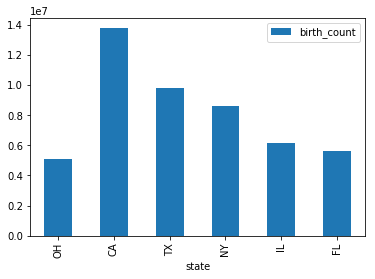

In [4]:
total_births.plot(kind='bar', x='state', y='birth_count');

In [35]:
%%bigquery mothers_histogram
SELECT SUM(year) as year,
COUNT(mother_age) as mother_hist,
  COUNTIF(mother_age <=10 AND mother_age >=0) AS very_young_group,
  COUNTIF(mother_age <=16 AND mother_age >=11) AS teen_group,
  COUNTIF(mother_age <=25 AND mother_age >=17) AS young_adult,
  COUNTIF(mother_age <=36 AND mother_age >=26) AS adult,
  COUNTIF(mother_age <=46 AND mother_age >=37) AS midage_adult,
  COUNTIF(mother_age <=120 AND mother_age >=47) AS old_adult
  FROM
     `bigquery-public-data.samples.natality` WHERE source_year BETWEEN 1998 AND 2008
  GROUP BY mother_age

,year,mother_hist,very_young_group,teen_group,young_adult,adult,midage_adult,old_adult
0,90628461087,45244394,16,794480,17904222,23021064,3506659,17953


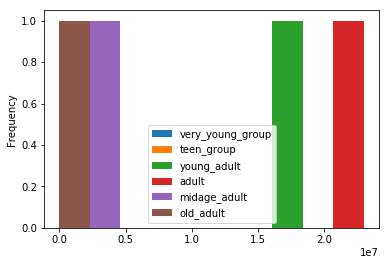

In [40]:
mothers_histogram.plot(kind='hist', x='year' , y=['very_young_group','teen_group','young_adult','adult',
'midage_adult','old_adult']);

In [41]:
%%bigquery mothers_histogram
SELECT SUM(year) as year,
COUNT(mother_age) as mother_hist,
  COUNTIF(mother_age <=10 AND mother_age >=0) AS very_young_group,
  COUNTIF(mother_age <=16 AND mother_age >=11) AS teen_group,
  COUNTIF(mother_age <=25 AND mother_age >=17) AS young_adult,
  COUNTIF(mother_age <=36 AND mother_age >=26) AS adult,
  COUNTIF(mother_age <=46 AND mother_age >=37) AS midage_adult,
  COUNTIF(mother_age <=120 AND mother_age >=47) AS old_adult
  FROM
     `bigquery-public-data.samples.natality` WHERE source_year BETWEEN 1998 AND 2008
  GROUP BY mother_age

,year,mother_hist,very_young_group,teen_group,young_adult,adult,midage_adult,old_adult
0,5937153,2961,0,0,0,0,0,2961
1,3666614,1831,0,1831,0,0,0,0
2,15624986,7798,0,0,0,0,0,7798
3,402116,201,0,0,0,0,0,201
4,231984,116,0,116,0,0,0,0
5,4673453020,2333069,0,0,2333069,0,0,0
6,4246782653,2120190,0,0,2120190,0,0,0
7,4440263247,2216757,0,0,2216757,0,0,0
8,994260927,496449,0,496449,0,0,0,0
9,133481885,66656,0,66656,0,0,0,0


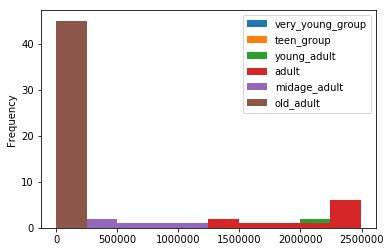

In [44]:
mothers_histogram.plot(kind='hist', x='year' , y=['very_young_group','teen_group','young_adult','adult',
'midage_adult','old_adult']);

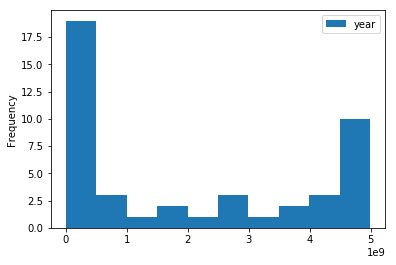

In [45]:
mothers_histogram.plot(kind='hist', y='year' , x=['very_young_group','teen_group','young_adult','adult',
'midage_adult','old_adult']);

In [51]:
%%bigquery father_avg
SELECT
  year,
  AVG(father_age) AS avg_age
  FROM
     `bigquery-public-data.samples.natality` WHERE source_year BETWEEN 1998 AND 2008
GROUP BY
  year
ORDER BY year DESC

,year,avg_age
0,2008,40.072469
1,2007,40.302761
2,2006,40.343240
3,2005,39.975258
4,2004,39.831135
5,2003,39.744694
6,2002,39.663417
7,2001,39.630709
8,2000,39.732720
9,1999,39.864549


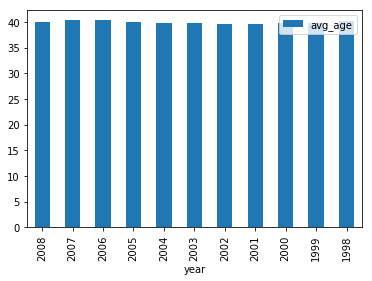

In [52]:
father_avg.plot(kind='bar', x='year', y='avg_age');